### 5-5. 다항 회귀와 과적합/과소적합
* 다항 회귀를 비선형 회귀로 혼동하기 쉽지만, 다항 회귀는 선형 회귀
* 회귀에서 선형 회귀/비선형 회귀는 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관

In [2]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2x2 행렬 생성
X=np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처: \n', X)

# degree=2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 반환
poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr=poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처: 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [3]:
def polynomial_func(X):
    y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

X=np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature:\n', X)
y=polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [7]:
from sklearn.linear_model import LinearRegression

# 3차 다항식 변환
poly_ftr=PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수확인
model=LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 shape : ', model.coef_.shape)

C:\Users\SJ\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape :  (10,)


피처 변환과 선형 회귀 적용을 각각 별도로 하는 것보다 사이킷 런의 Pipeline 객체를 이용해 한 번에 다항 회귀를 구현

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature변환과 Linear Regression을 연결
model=Pipeline([('poly', PolynomialFeatures(degree=3)),
               ('linear', LinearRegression())])
X=np.arange(4).reshape(2, 2)
y=polynomial_func(X)

model=model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


#### 다항 회귀를 이용한 과소적합 및 과적합
* 다항식의 차수가 높아질수록 매우 복잡한 피처간의 관계까지 모델링 가능
* 차수가 높아질수록 과적합 문제


Degree 1 회귀 계수는 [-1.61] 
Degree 1 MSE는 0.40772896250986834

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 
Degree 4 MSE는 0.04320874987231747

Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 
Degree 15 MSE는 182815433.47648773


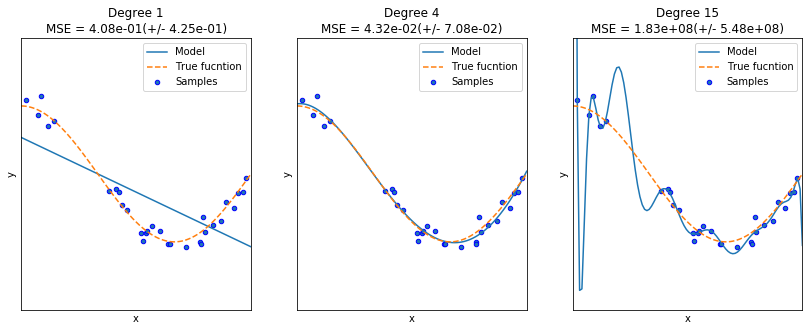

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5*np.pi*X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples=30
X=np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동값을 더한 값
y=true_fun(X)+np.random.randn(n_samples)*0.1

plt.figure(figsize=(14, 5))
degrees=[1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax=plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial변환
    polynomial_features=PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression=LinearRegression()
    pipeline=Pipeline([("polynomial_features", polynomial_features),
                      ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차검증으로 다항회귀
    scores=cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients=pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} '.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE는 {1}'.format(degrees[i], -1*np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test=np.linspace(0, 1, 100)
    
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True fucntion")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
    
plt.show()

* Degree 1 예측
    * 직선-> 단순 선형 회귀
    * 예측 곡선이 학습 데이터의 패턴을 제대로반영하지 못하고 있는 과소적합 모델
    * MSE값은 약 0.407
* Degree 4 예측
    * 실제 데이터 세트와 유사한 모습
    * MSE값은 약 0.043
* Degree 15 예측
    * 데이터 세트의 변동 잡음 값까지 지나치게 반영한 결과, 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어짐
    * 과적합 결과

* 낮은 편향, 낮은 분산
    * 예측 결과가 실제 결과에 매우 잘 근접하면서도 예측 변동이 크지 않고 특정 부분에 집중돼 있는 아주 뛰어난 성능
* 낮은 편향, 높은 분산 -> 과적합되기 쉬움
    * 예측 결과가 실제 결과에 비교적 근접하지만 예측 결과가 실제 결과를 중심으로 넓은 부분에 분포
* 높은 편향, 낮은 분산 -> 과소적합되기 쉬움
    * 정확한 결과에서 벗어나면서도 예측이 특정 부분에 집중돼 있음
* 높은 편향, 높은 분산 
    * 정확한 예측 결과를 벗어나면서도 넓은 부분에 분포
    
* 편향이 너무 높으면 전체 오류가 높음
* 편향을 점점 낮추면 동시에 분산이 높아지고 전체 오류가 낮아지게 됨